**Universidade Federal do Pará**

**Mestrado em Computação Aplicada PPCA/Tucuruí**

**Disciplina: Inteligência Artificial**

Laciene Alves Melo

---

> Objetivo: Aplicar modelos para prever se o crédito do cliente deve ou não ser aprovado

In [243]:
import pandas as pd
# codificação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# trenamento e teste
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
# matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
# RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [244]:
# carregando a base de dados
dataset = pd.read_csv('../dataset/normalized.csv')
dataset

,score,state,gender,age,patrimony,balance,products,credit_card,active,approved_credit
0,619,RS,F,42,2,0,1,1,1,1
1,608,SC,F,41,1,8380786,1,0,1,0
2,502,RS,F,42,8,1596608,3,1,0,1
3,699,RS,F,39,1,0,2,0,0,0
4,850,SC,F,43,2,12551082,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
994,838,SC,M,43,9,12310588,2,1,0,0
995,610,SC,M,29,9,0,3,0,1,0
996,811,SC,M,44,3,0,2,0,1,0
997,587,SC,M,62,7,12128627,1,0,1,0


In [245]:
# transformação de dados codificação de variáveis categóricas
cols = ['score','state', 'gender', 'age', 'patrimony', 'balance', 'products', 'credit_card', 'active']

# Importe o LabelEncoder
le = LabelEncoder()

# Iterar sobre as colunas categóricas e aplicar o LabelEncoder a cada uma delas
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])

In [246]:
# previsores
X = dataset
X = X.drop(columns=['approved_credit'])
# X

In [247]:
# classe de saída
y = dataset['approved_credit']

# Dividindo a base de dados em treino e teste

In [248]:
# dividindo a base de dados em treino e teste, 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo KNN

In [249]:
# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [250]:
# Fazendo as previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

In [251]:
# relatório de desempenho do modelo KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       159
           1       0.32      0.17      0.22        41

    accuracy                           0.76       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.71      0.76      0.72       200



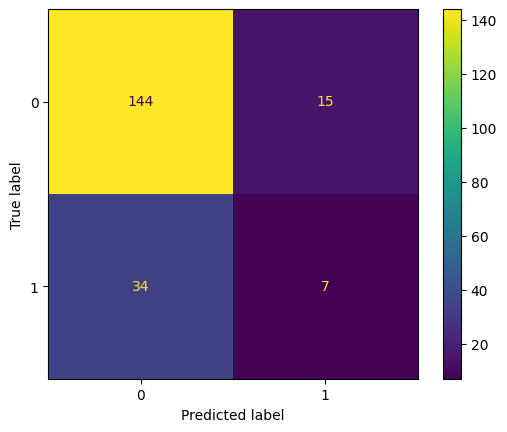

In [252]:
# Crie a matriz de confusão
confMatrixKNN = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn))
confMatrixKNN.plot()

# Modelo Random Forest

In [253]:
# criando modelo random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [254]:
# fazendo a previsão dos conjuntos de teste
y_pred_RF = random_forest.predict(X_test)

In [255]:
# relatório de desempenho do modelo Random Forest
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       159
           1       0.73      0.39      0.51        41

    accuracy                           0.84       200
   macro avg       0.79      0.68      0.71       200
weighted avg       0.83      0.84      0.83       200



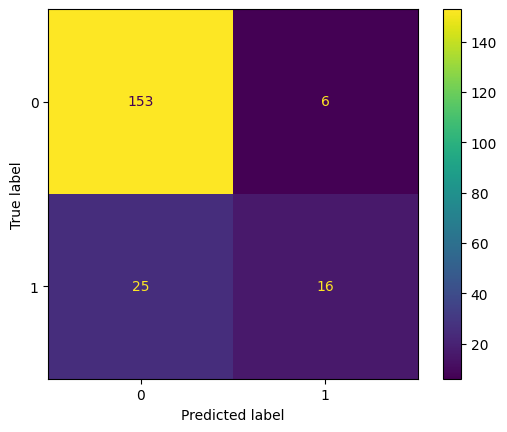

In [256]:
# Crie a matriz de confusão
confMatrixRF = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RF))
confMatrixRF.plot()

# Modelo SVM

In [257]:
# criando modelo SVM
svm=SVC()
svm.fit(X_train, y_train)

SVC()

In [258]:
# fazendo a previsão dos conjuntos de teste
y_pred_svm = svm.predict(X_test)

In [259]:
# relatório de desempenho do modelo SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

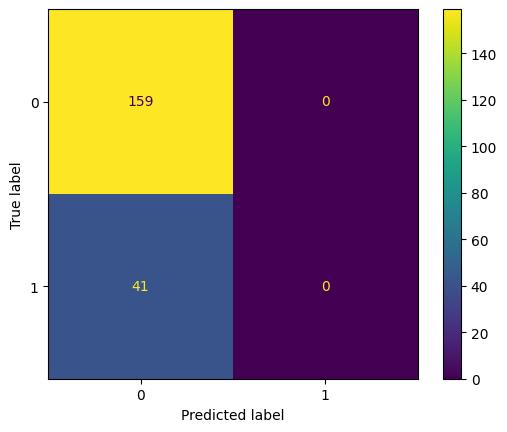

In [260]:
# Crie a matriz de confusão
confMatrixSVM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm))
confMatrixSVM.plot()

# Modelo Árvore de Decisão

In [261]:
# criando modelo de árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [262]:
# fazendo a previsão dos conjuntos de teste
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0])

In [263]:
# relatório de desempenho do modelo de árvore de decisão
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       159
           1       0.44      0.46      0.45        41

    accuracy                           0.77       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.77      0.77      0.77       200



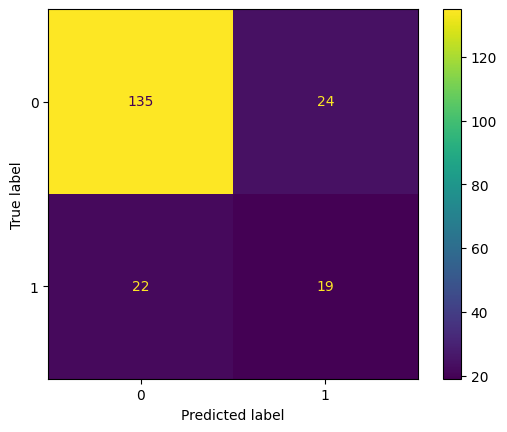

In [264]:
# Crie a matriz de confusão
confMatrixDecisionTree = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_tree))
confMatrixDecisionTree.plot()

# Modelo RNA

In [265]:
# Crie a arquitetura da RNA
model = Sequential()

# Adicione a primeira camada densamente conectada
# Ela tem 9 neurônios (ou unidades) que representam o número de parâmetros previsores
# Usa a função de ativação 'relu', input_shape número de características do conjunto de treinamento
model.add(Dense(9, activation='relu', input_shape=(X_train.shape[1],)))

# Adicione a segunda camada densamente conectada
# Esta é a primeira camada oculta
# Ela tem 100 neurônios e usa a função de ativação 'relu'
model.add(Dense(100, activation='relu'))

# Adicione a terceira camada densamente conectada
# Esta é a camada de saída
# sigmoid para classificação binária
# Ela tem um neurônio de saída, justamente por ser uma saída binária
model.add(Dense(1, activation='sigmoid'))

In [266]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [267]:
# treina o modelo
# atualiza o modelo após processar 32 lotes batch_size
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 0s 630us/step - loss: 5.1392 - accuracy: 0.5870
Epoch 2/100
25/25 [==============================] - 0s 572us/step - loss: 1.1504 - accuracy: 0.7484
Epoch 3/100
25/25 [==============================] - 0s 537us/step - loss: 0.6426 - accuracy: 0.7359
Epoch 4/100
25/25 [==============================] - 0s 478us/step - loss: 0.5818 - accuracy: 0.7735
Epoch 5/100
25/25 [==============================] - 0s 455us/step - loss: 0.5649 - accuracy: 0.7559
Epoch 6/100
25/25 [==============================] - 0s 778us/step - loss: 0.5499 - accuracy: 0.7760
Epoch 7/100
25/25 [==============================] - 0s 642us/step - loss: 0.5483 - accuracy: 0.7747
Epoch 8/100
25/25 [==============================] - 0s 532us/step - loss: 0.5256 - accuracy: 0.7835
Epoch 9/100
25/25 [==============================] - 0s 550us/step - loss: 0.5289 - accuracy: 0.7835
Epoch 10/100
25/25 [==============================] - 0s 849us/step - loss: 0.5393 - accura

In [268]:
# Fazendo a previsão do conjunto de teste
y_pred_RNA = model.predict(X_test)
y_pred_RNA = le.inverse_transform(y_pred_RNA.argmax(axis=1))

7/7 [==============================] - 0s 946us/step


In [269]:
# relatório de desempenho do modelo RNA
print(classification_report(y_test, y_pred_RNA))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

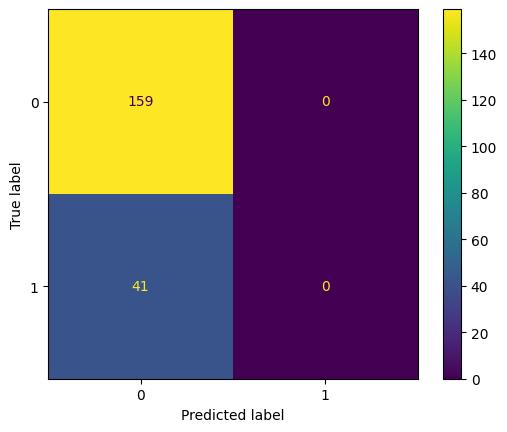

In [270]:
# Crie a matriz de confusão
confMatrixRNA = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RNA))
confMatrixRNA.plot()